# 講談社「Pythonではじめるベイズ機械学習入門」第3章 回帰モデル

## 3.6 ガウス過程回帰モデル：ガウス尤度

In [1]:
using Distributions
using Plots

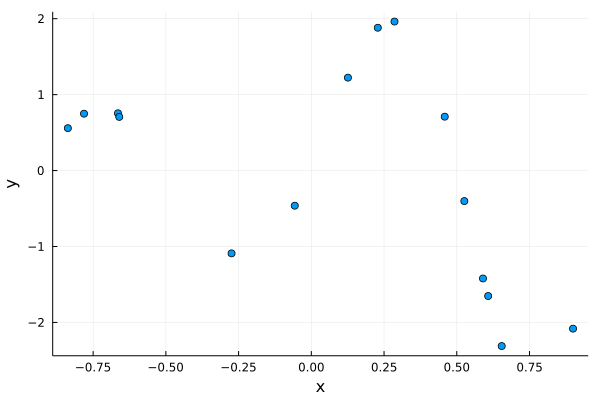

In [2]:
true_func(x) = 1.5 * exp.(x) .* sin.(2 * pi * x)

function generate_train_dataset(N)
    x = rand(Uniform(-1, 1), N)
    y = true_func(x) .+ 0.1 * rand(N)
    return x, y
end

function visualize_train_dataset(x, y)
    p = scatter(x, y, xlabel="x", ylabel="y", label=:none)
    return p
end

N = 15
x_data, y_data = generate_train_dataset(N)
p = visualize_train_dataset(x_data, y_data)

In [3]:
using GaussianProcesses

In [28]:
μ = MeanZero()
kernel = SE(0.0, 0.0)
gp = GP(x_data, y_data, μ, kernel)

GP Exact object:
  Dim = 1
  Number of observations = 15
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[0.22851995680874837 0.6544369689830929 … -0.05689651640840432 0.5900839851332917]
  Output observations = [1.8806409934560426, -2.3109469682355983, 1.962246547654485, 0.7543760208826154, 0.7066551509641698, -1.652160135657176, -0.40177302547862376, 1.223487029984576, 0.5582744755453901, 0.7095414816008655, 0.7488248633156736, -2.0818093842757013, -1.0902705046362136, -0.4626018538318374, -1.4209342770658415]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -372.606

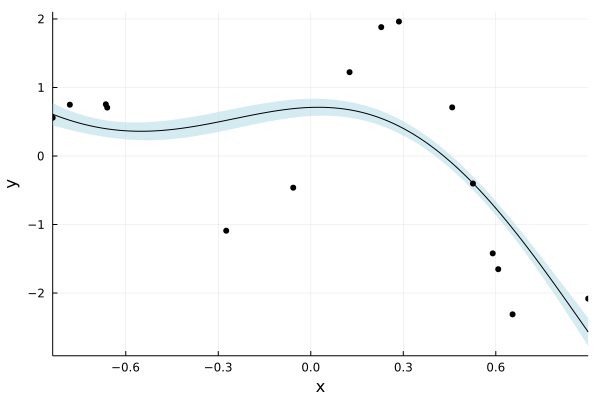

In [29]:
plot(gp; xlabel="x", ylabel="y", legend=false, fmt=:png)

In [30]:
using Optim
optimize!(gp)

LinearAlgebra.PosDefException(12)
LinearAlgebra.PosDefException(12)
LinearAlgebra.PosDefException(3)
LinearAlgebra.PosDefException(2)


 * Status: success

 * Candidate solution
    Final objective value:     1.298411e+01

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.73e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.50e-12 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.68e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.06e-13 ≰ 0.0e+00
    |g(x)|                 = 4.24e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    12
    f(x) calls:    54
    ∇f(x) calls:   54


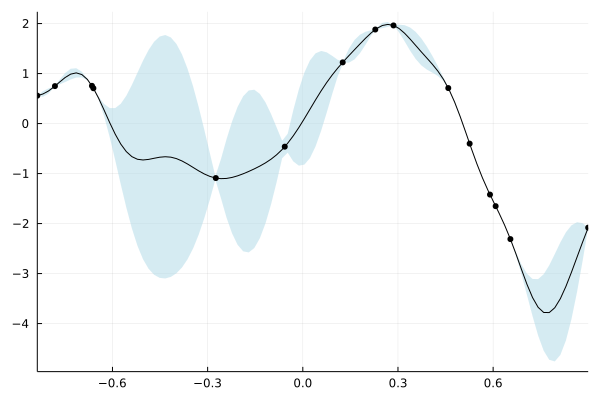

In [31]:
plot(gp; legend=:none, fmt=:png)

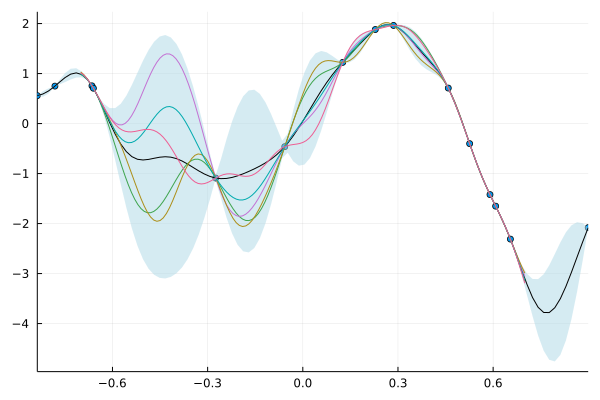

In [27]:
x = -0.7:0.01:0.7
scatter(x_data, y_data, label=:none)
plot!(gp; obsv=false, label=:none, fmt=:png)
samples = rand(gp, x, 5)
plot!(x, samples, label=:none)